In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_frame = pd.read_csv("train.csv")

In [3]:
data_frame.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [5]:
data_frame.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [6]:
data_frame

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...,...
32764,1,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,1,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,1,34924,28805,117961,118327,120299,124922,152038,118612,124924
32767,1,80574,55643,118256,118257,117945,280788,280788,292795,119082


In [7]:
data_frame["ACTION"].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

<AxesSubplot:xlabel='ACTION', ylabel='count'>

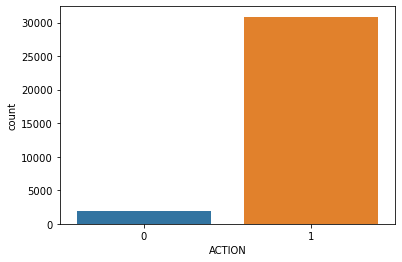

In [8]:
sns.countplot(data_frame["ACTION"])

In [9]:
data_frame_1 = data_frame

<AxesSubplot:>

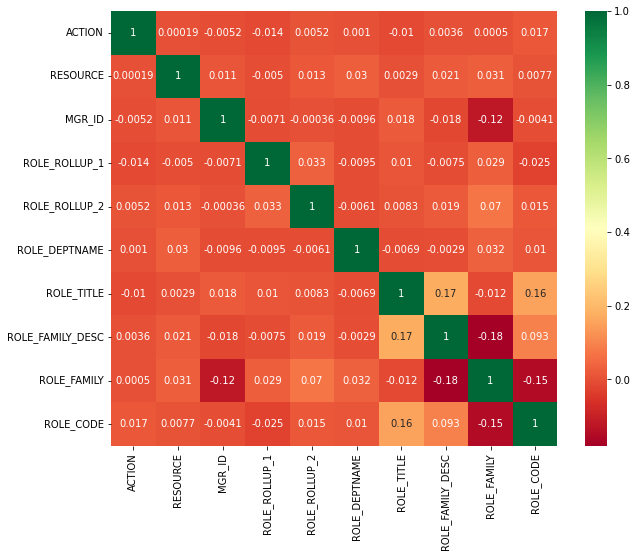

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(data = data_frame_1.corr(), annot = True, cmap = 'RdYlGn')

In [11]:
from sklearn.utils import resample

In [12]:
df_majority = data_frame_1[data_frame_1["ACTION"] == 1]
df_minority = data_frame_1[data_frame_1["ACTION"] == 0]
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 23000, random_state = 42)

In [13]:
data_frame_bal = pd.concat([df_minority_upsampled, df_majority])

In [14]:
data_frame_bal.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
19675,0,7543,6997,117961,118343,119945,118321,117906,290919,118322
25615,0,38723,19642,117961,118413,118481,118784,117906,290919,118786
14749,0,20218,15616,119280,119281,118623,118995,286106,292795,118997
22749,0,33115,27619,117961,118413,118414,118321,117906,290919,118322
19726,0,17278,2710,118290,118291,120823,118396,269406,118398,118399


In [15]:
data_frame_bal["ACTION"].value_counts()

1    30872
0    23000
Name: ACTION, dtype: int64

<AxesSubplot:xlabel='ACTION', ylabel='count'>

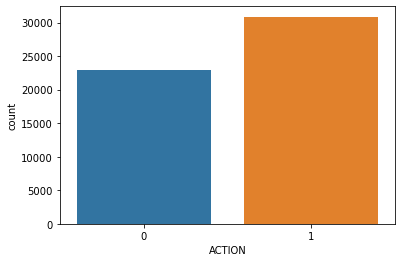

In [16]:
sns.countplot(data_frame_bal["ACTION"])

In [17]:
data_frame_bal["ROLE_ROLLUP_1"].value_counts()

117961    33445
118256     1108
117902     1056
91261      1005
119062      944
          ...  
118774        1
209434        1
147236        1
133430        1
120354        1
Name: ROLE_ROLLUP_1, Length: 128, dtype: int64

In [18]:
data_frame_bal["ROLE_ROLLUP_2"].value_counts()

118300    6552
118343    5334
118327    3970
118225    3734
118052    3679
          ... 
176316       1
132840       1
185842       1
131390       1
140550       1
Name: ROLE_ROLLUP_2, Length: 177, dtype: int64

In [19]:
data_frame_bal["ROLE_DEPTNAME"].value_counts()

117878    1947
117945    1663
117941    1473
117920    1233
118992    1081
          ... 
122587       1
119565       1
29113        1
119496       1
121097       1
Name: ROLE_DEPTNAME, Length: 449, dtype: int64

In [20]:
data_frame_bal["ROLE_TITLE"].value_counts()

118321    8782
117905    4924
118784    3137
117879    2872
118568    1880
          ... 
130633       1
239003       1
157347       1
208565       1
130362       1
Name: ROLE_TITLE, Length: 343, dtype: int64

In [21]:
data_frame_bal.reset_index(drop =  True, inplace = True)

<AxesSubplot:>

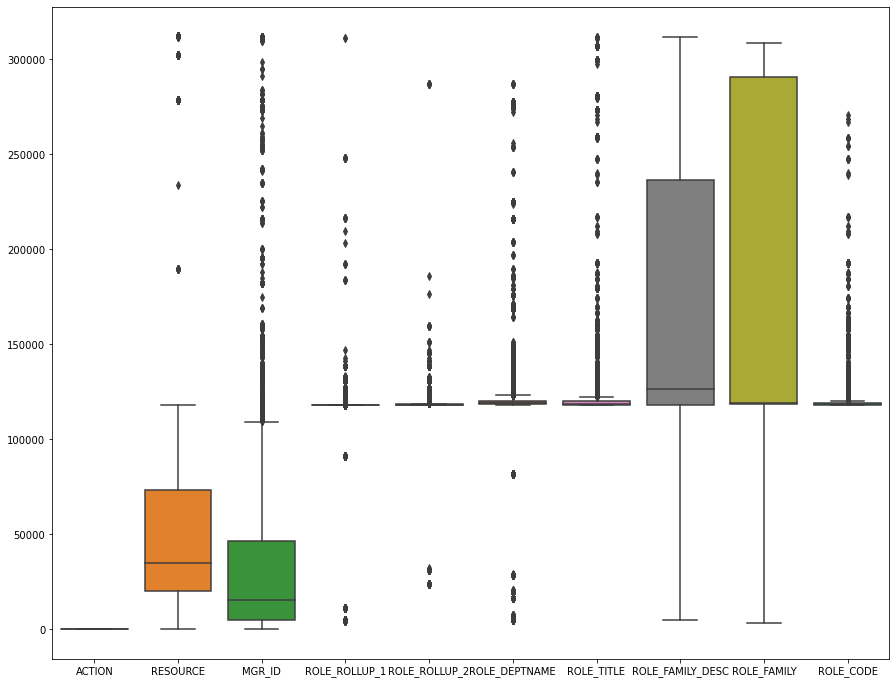

In [22]:
plt.figure(figsize = (15,12))
sns.boxplot(data = data_frame_bal)

In [23]:
X0 = data_frame.drop("ACTION", axis = 1)
X1 = data_frame_bal.drop("ACTION", axis = 1)
Y0 = data_frame["ACTION"]
Y1 = data_frame_bal["ACTION"]

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [25]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size = 0.2, random_state = 101)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 101)

# LOGISTIC REGRESSION

## MODEL BUILDING

In [26]:
log_model_unbal = LogisticRegression()
log_model_bal = LogisticRegression()

In [27]:
log_model_unbal.fit(X0_train, Y0_train)
log_model_bal.fit(X1_train, Y1_train)

LogisticRegression()

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
Y0_predict = log_model_unbal.predict(X0_test)
Y1_predict = log_model_bal.predict(X1_test)

## CONFUSION MATRICES

UNBALANCED DATASET CONFUSION MATRIX:


<AxesSubplot:>

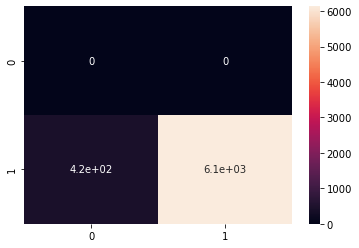

In [30]:
print("UNBALANCED DATASET CONFUSION MATRIX:")
sns.heatmap(confusion_matrix(Y0_predict, Y0_test),  annot = True)

BALANCED DATASET CONFUSION MATRIX: [[  31   64]
 [4582 6098]]


<AxesSubplot:>

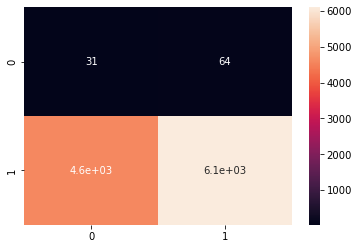

In [31]:
print("BALANCED DATASET CONFUSION MATRIX:", confusion_matrix(Y1_predict, Y1_test))
sns.heatmap(confusion_matrix(Y1_predict, Y1_test),  annot = True)

## CLASSIFICATION REPORT

In [32]:
print("UNBALANCED DATASET CLASSIFICATION:")
print(classification_report(Y0_predict, Y0_test))

UNBALANCED DATASET CLASSIFICATION:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97      6554

    accuracy                           0.94      6554
   macro avg       0.50      0.47      0.48      6554
weighted avg       1.00      0.94      0.97      6554



In [33]:
print("BALANCED DATASET CLASSIFICATION:")
print(classification_report(Y1_predict, Y1_test))

BALANCED DATASET CLASSIFICATION:
              precision    recall  f1-score   support

           0       0.01      0.33      0.01        95
           1       0.99      0.57      0.72     10680

    accuracy                           0.57     10775
   macro avg       0.50      0.45      0.37     10775
weighted avg       0.98      0.57      0.72     10775



# DECISION TREE

## BUILDING MODEL

In [34]:
params = [{"max_depth":[3,5,7,9,11],'max_features' : [0.1,0.2,0.3,0.5]}]
model_dt = DecisionTreeClassifier(random_state = 101)
model_cv = GridSearchCV(model_dt, params, cv = 10, scoring = 'roc_auc')
model_cv.fit(X0_train, Y0_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             param_grid=[{'max_depth': [3, 5, 7, 9, 11],
                          'max_features': [0.1, 0.2, 0.3, 0.5]}],
             scoring='roc_auc')

In [35]:
#best parameters for unbalanced dataset
model_cv.best_params_

{'max_depth': 11, 'max_features': 0.3}

In [36]:
# best parameters for unbalanced dataset
model_cv.fit(X1_train, Y1_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             param_grid=[{'max_depth': [3, 5, 7, 9, 11],
                          'max_features': [0.1, 0.2, 0.3, 0.5]}],
             scoring='roc_auc')

In [37]:
model_cv.best_params_

{'max_depth': 11, 'max_features': 0.5}

## Building model for unbalanced dataset

In [38]:
model_dt_unbal = DecisionTreeClassifier(max_depth = 11, max_features = 0.3)

In [39]:
model_dt_unbal.fit(X0_train, Y0_train)

DecisionTreeClassifier(max_depth=11, max_features=0.3)

In [40]:
Y0_predict_dt = model_dt_unbal.predict(X0_test)

## CONFUSION MATRIX - Decision Tree(Unbalanced)

[[  55  364]
 [  70 6065]]


<AxesSubplot:>

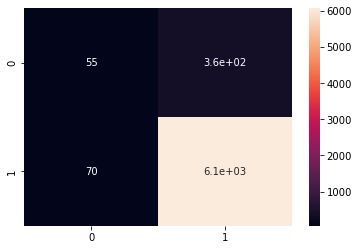

In [41]:
print(confusion_matrix(Y0_test, Y0_predict_dt))
sns.heatmap(confusion_matrix(Y0_test, Y0_predict_dt), annot = True)

## CLASSIFICATION REPORT

In [42]:
print(classification_report(Y0_test, Y0_predict_dt))

              precision    recall  f1-score   support

           0       0.44      0.13      0.20       419
           1       0.94      0.99      0.97      6135

    accuracy                           0.93      6554
   macro avg       0.69      0.56      0.58      6554
weighted avg       0.91      0.93      0.92      6554



## Building model for balanced dataset

In [43]:
model_dt_bal = DecisionTreeClassifier(max_depth = 11, max_features = 0.5)
model_dt_bal.fit(X1_train, Y1_train)
Y1_predict_dt = model_dt_bal.predict(X1_test)

## CONFUSION MATRIX - Decision Tree(Balanced)

[[3677  936]
 [1330 4832]]


<AxesSubplot:>

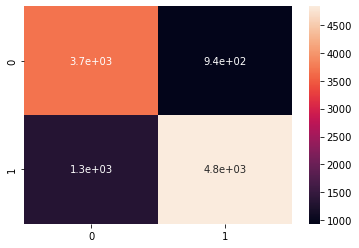

In [44]:
print(confusion_matrix(Y1_test, Y1_predict_dt))
sns.heatmap(confusion_matrix(Y1_test, Y1_predict_dt), annot = True)

## CLASSIFICATION REPORT

In [45]:
print(classification_report(Y1_test, Y1_predict_dt))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76      4613
           1       0.84      0.78      0.81      6162

    accuracy                           0.79     10775
   macro avg       0.79      0.79      0.79     10775
weighted avg       0.79      0.79      0.79     10775



# RANDOM FOREST

In [46]:
params = [{"n_estimators":[50,100,150,200],"max_depth":[3,5,7,9,11],'max_features' : [0.1,0.2,0.3,0.5]}]
model_rf = RandomForestClassifier(random_state = 101)
model_cv_rf = GridSearchCV(model_rf, params, cv = 10, scoring = 'roc_auc')

In [47]:
print("Best parameters for unbalanced dataset")
print(model_cv_rf.fit(X0_train,Y0_train))

Best parameters for unbalanced dataset
GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             param_grid=[{'max_depth': [3, 5, 7, 9, 11],
                          'max_features': [0.1, 0.2, 0.3, 0.5],
                          'n_estimators': [50, 100, 150, 200]}],
             scoring='roc_auc')


In [48]:
# best parameters unbalanced dataset
model_cv_rf.best_params_

{'max_depth': 11, 'max_features': 0.5, 'n_estimators': 200}

In [49]:
print("Best parameters for balanced dataset")
print(model_cv_rf.fit(X1_train,Y1_train))

Best parameters for balanced dataset
GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             param_grid=[{'max_depth': [3, 5, 7, 9, 11],
                          'max_features': [0.1, 0.2, 0.3, 0.5],
                          'n_estimators': [50, 100, 150, 200]}],
             scoring='roc_auc')


In [50]:
# best parameters unbalanced dataset
model_cv_rf.best_params_

{'max_depth': 11, 'max_features': 0.5, 'n_estimators': 150}

## MODEL BUILDING RF(Unbalanced)

In [51]:
model_rf_unbal = RandomForestClassifier(max_depth = 11, max_features = 0.5, n_estimators = 150)

In [52]:
model_rf_unbal.fit(X0_train, Y0_train) 

RandomForestClassifier(max_depth=11, max_features=0.5, n_estimators=150)

In [53]:
Y0_rf_predict = model_rf_unbal.predict(X0_test)

## CONFUSION MATRIX

[[  30  389]
 [   6 6129]]


<AxesSubplot:>

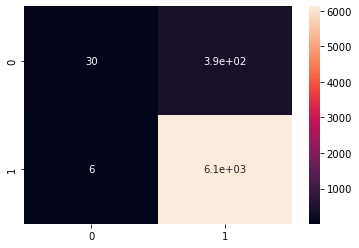

In [54]:
print(confusion_matrix(Y0_test, Y0_rf_predict))
sns.heatmap(confusion_matrix(Y0_test, Y0_rf_predict), annot = True)

## CLASSIFICATION REPORT

In [55]:
print(classification_report(Y0_test, Y0_rf_predict))

              precision    recall  f1-score   support

           0       0.83      0.07      0.13       419
           1       0.94      1.00      0.97      6135

    accuracy                           0.94      6554
   macro avg       0.89      0.54      0.55      6554
weighted avg       0.93      0.94      0.92      6554



## MODEL BUILDING RF(Balanced)

In [56]:
model_rf_bal = RandomForestClassifier(max_depth = 11, max_features = 0.5, n_estimators = 150)

In [57]:
model_rf_bal.fit(X1_train, Y1_train)

RandomForestClassifier(max_depth=11, max_features=0.5, n_estimators=150)

In [58]:
Y1_rf_predict = model_rf_bal.predict(X1_test)

## CONFUSION MATRIX

[[3916  697]
 [ 442 5720]]


<AxesSubplot:>

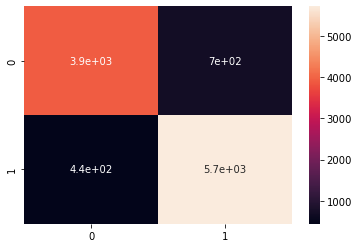

In [59]:
print(confusion_matrix(Y1_test, Y1_rf_predict))
sns.heatmap(confusion_matrix(Y1_test, Y1_rf_predict), annot = True)

In [60]:
print(classification_report(Y1_test, Y1_rf_predict))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4613
           1       0.89      0.93      0.91      6162

    accuracy                           0.89     10775
   macro avg       0.89      0.89      0.89     10775
weighted avg       0.89      0.89      0.89     10775



# SUPPORT VECTOR CLASSIFIER

## RBF KERNEL

In [61]:
model_svc_1 = SVC(kernel = "rbf")

In [62]:
model_svc_1.fit(X = X0_train, y = Y0_train)

SVC()

In [63]:
 Y0_svc_predict = model_svc_1.predict(X0_test)

## CONFUSION MATRIX

[[   0  419]
 [   0 6135]]


<AxesSubplot:>

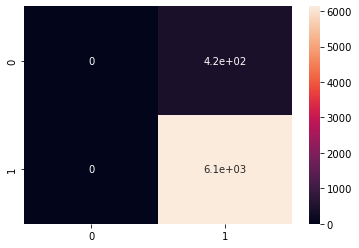

In [64]:
print(confusion_matrix(Y0_test, Y0_svc_predict))
sns.heatmap(confusion_matrix(Y0_test, Y0_svc_predict), annot = True)

## CLASSIFICATION REPORT

In [66]:
print(classification_report(Y0_test, Y0_svc_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       419
           1       0.94      1.00      0.97      6135

    accuracy                           0.94      6554
   macro avg       0.47      0.50      0.48      6554
weighted avg       0.88      0.94      0.91      6554



In [67]:
model_svc_1.fit(X = X1_train, y = Y1_train)

SVC()

In [70]:
 Y1_svc_predict = model_svc_1.predict(X1_test)

## CONFUSION MATRIX balanced

[[1457 3156]
 [ 986 5176]]


<AxesSubplot:>

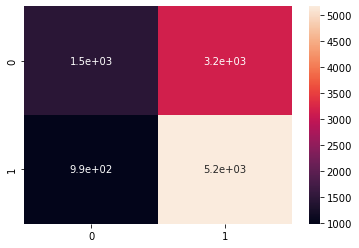

In [71]:
print(confusion_matrix(Y1_test, Y1_svc_predict))
sns.heatmap(confusion_matrix(Y1_test, Y1_svc_predict), annot = True)

## CLASSIFICATION REPORT

In [73]:
print(classification_report(Y1_test, Y1_svc_predict))

              precision    recall  f1-score   support

           0       0.60      0.32      0.41      4613
           1       0.62      0.84      0.71      6162

    accuracy                           0.62     10775
   macro avg       0.61      0.58      0.56     10775
weighted avg       0.61      0.62      0.59     10775



# PICKLING

In [86]:
import pickle

In [87]:
filename = "model_class_randomforest"

In [88]:
pickle.dump(model_rf_unbal, open(filename,'wb'))

In [ ]:
## Random Forest has highest accuracy according to the classification report, hence we will choose random forest as our classifier.